In [1]:
import os
os.chdir("Y:\Python\Mega_IT\E.Inferential_statistics/4.Linear_Regression/3.Regularization")
os.getcwd()

'Y:\\Python\\Mega_IT\\E.Inferential_statistics\\4.Linear_Regression\\3.Regularization'

In [2]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *
from yjk_module.preprocessing import *
from yjk_module.ml_module import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv("./data/Walmart_sales.csv")

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.drop('Date', axis = 1, inplace = True)

In [6]:
df['Store'] = df['Store'].astype('category')

In [7]:
X = df.copy()
Y = X.pop('Weekly_Sales')

In [8]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None)

아래와 같이 처리합니다.
+-------------+----------------+
| 범주        | 처리방법       |
|-------------+----------------|
| 이상치 처리 | 처리하지 않음  |
| 결측치 처리 | 중앙값 대체    |
| 스케일러    | StandardScaler |
| 인코딩      | 원핫인코딩     |
+-------------+----------------+


In [9]:
X_p = pp.fit_transform(X)

데이터프레임 크기 : (6435, 6)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 총 5개
명목형 데이터 컬럼 : ['Store'], 총 1개


In [10]:
X_p.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,-0.274204,-0.995136,-1.713800,1.004175,0.056964,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.646917,-1.201170,-1.766089,1.007880,0.056964,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.274204,-1.124178,-1.840166,1.009074,0.056964,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.274204,-0.760907,-1.737766,1.009849,0.056964,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.274204,-0.767955,-1.598328,1.010624,0.056964,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)

In [12]:
li_alpha = range(-4, 5)
result_df = pd.DataFrame()

for i, v in enumerate(li_alpha):
    model = Ridge(alpha = 10 ** v)
    model.fit(x_train, y_train)
    result_df.loc[i, 'alpha'] = v
    result_df.loc[i, 'R2_score_train'] = model.score(x_train, y_train)
    result_df.loc[i, 'R2_score_test'] = model.score(x_test, y_test)

In [13]:
result_df

,alpha,R2_score_train,R2_score_test
0,-4.0,0.920815,0.917210
1,-3.0,0.920815,0.917209
2,-2.0,0.920815,0.917199
3,-1.0,0.920803,0.917121
4,0.0,0.920643,0.916824
5,1.0,0.914117,0.910330
6,2.0,0.711644,0.709718
7,3.0,0.187026,0.192470
8,4.0,0.029895,0.032669


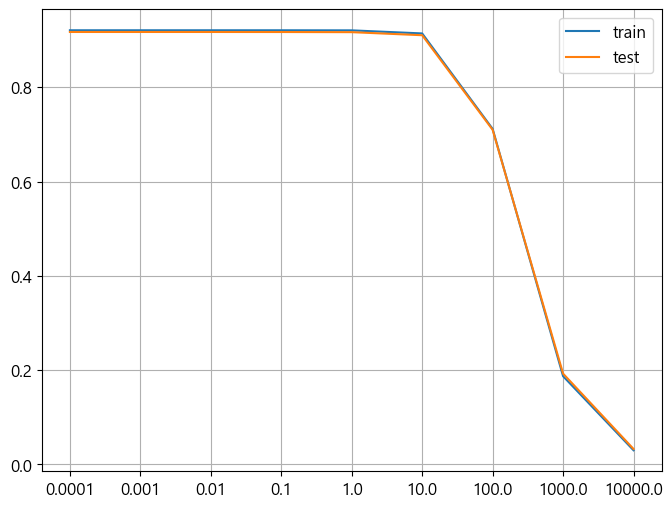

In [14]:
plt.figure()
plt.plot(result_df['alpha'], result_df['R2_score_train'], label = 'train')
plt.plot(result_df['alpha'], result_df['R2_score_test'], label = 'test')
plt.xticks(result_df['alpha'], 10 ** result_df['alpha'])
plt.grid()
plt.legend()
plt.show()

In [15]:
df2 = pd.read_csv("./data/Used_Car_Dataset.csv", index_col = 0)

In [16]:
df2.head()

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [17]:
df2.drop_duplicates(inplace = True)
df2.drop('max_power(bhp)', axis = 1, inplace = True)
df2.dropna(inplace = True)
df2 = df2[df2['price(in lakhs)'] < 10000]
df2 = df2[df2['registration_year'] != 'Third Party insurance']

cond = df2[df2['ownsership'].str.contains('cc')]
df2.loc[cond.index, 'engine(cc)'] = cond['ownsership'].apply(lambda x : int(x[:-2].strip()))
df2.loc[cond.index, 'ownsership'] = 'First Owner'

cond = df2[df2['transmission'].str.contains('20')]
df.loc[cond.index, 'transmission'] = 'Manual'

cond = df2[df2['manufacturing_year'].str.contains('Power')]
df2.loc[cond.index, 'manufacturing_year'] = cond['registration_year']
df2['manufacturing_year'] = df2['manufacturing_year'].astype('int')

cond = df2[df2['registration_year'].str.contains('-')]
df2.loc[cond.index, 'registration_year'] = cond['registration_year'].apply(lambda x : int(x[-2:]) + 2000)
df2['registration_year'] = df2['registration_year'].astype('int')

df2 = df2[df2['engine(cc)'] < 10000]
df2['seats'] = df2['seats'].astype('category')

rename_dict = {'mileage(kmpl)' : 'mileage',
               'engine(cc)' : 'engine',
               'torque(Nm)' : 'torque',
               'price(in lakhs)' : 'price'}
df2.rename(columns = rename_dict, inplace = True)

df2 = df2.query('kms_driven < 250000 and torque < 30000 and mileage < 100')

df2.reset_index(inplace = True, drop = True)
df2.drop('car_name', axis = 1, inplace = True)

df2['torque_bin'] = df2['torque'].apply(lambda x : 'high' if x > 4500 else 'low')
df2['fuel_trans'] = df2['fuel_type'] + "_" + df2['transmission']

col_n = ['kms_driven', 'mileage', 'engine', 'torque']
pf = PolynomialFeatures(degree = 2, include_bias = False)

X_n = df2[col_n]
X_o = df2.drop(col_n, axis = 1)
X_n = pd.DataFrame(pf.fit_transform(X_n), columns = pf.get_feature_names_out())
poly_X = pd.concat([X_n, X_o], axis = 1)

In [18]:
X = poly_X.copy()
Y = X.pop('price')

In [19]:
X_p = pp.fit_transform(X)

데이터프레임 크기 : (943, 23)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['kms_driven', 'mileage', 'engine', 'torque', 'kms_driven^2', 'kms_driven mileage', 'kms_driven engine', 'kms_driven torque', 'mileage^2', 'mileage engine', 'mileage torque', 'engine^2', 'engine torque', 'torque^2', 'registration_year', 'manufacturing_year'], 총 16개
명목형 데이터 컬럼 : ['insurance_validity', 'fuel_type', 'seats', 'ownsership', 'transmission', 'torque_bin', 'fuel_trans'], 총 7개


In [20]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)

In [21]:
li_alpha = range(-4, 5)
result_df = pd.DataFrame()

for i, v in enumerate(li_alpha):
    model = Ridge(alpha = 10 ** v)
    model.fit(x_train2, y_train2)
    result_df.loc[i, 'alpha'] = v
    result_df.loc[i, 'R2_score_train'] = model.score(x_train2, y_train2)
    result_df.loc[i, 'R2_score_test'] = model.score(x_test2, y_test2)

In [22]:
result_df

,alpha,R2_score_train,R2_score_test
0,-4.0,0.675430,0.680070
1,-3.0,0.675430,0.680076
2,-2.0,0.675430,0.680137
3,-1.0,0.675414,0.680698
4,0.0,0.674441,0.683214
5,1.0,0.661249,0.674172
6,2.0,0.619803,0.649455
7,3.0,0.537264,0.594587
8,4.0,0.232681,0.265448


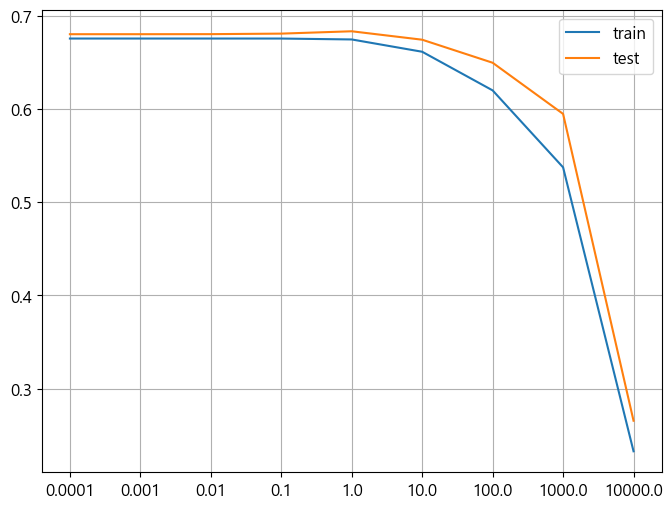

In [23]:
plt.figure()
plt.plot(result_df['alpha'], result_df['R2_score_train'], label = 'train')
plt.plot(result_df['alpha'], result_df['R2_score_test'], label = 'test')
plt.xticks(result_df['alpha'], 10 ** result_df['alpha'])
plt.grid()
plt.legend()
plt.show()

- 릿지와 라쏘는 변수별로 유의확률과 VIF 값을 구할 수 없음
    - 라쏘의 비표준화 계수 0은 해당 변수를 사용하지 않는다는 의미

In [24]:
test_model = YjkQuantileRegressor()

In [25]:
data = pd.concat([x_train2, y_train2], axis = 1)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [27]:
test_model.fit(XGBRegressor(max_depth = 9), RandomForestClassifier(max_depth = 9), data, 'price')

In [28]:
pred = test_model.predict(x_test2, soft = True)

In [29]:
r2_score(y_test2, pred)

0.7762641235750916

In [30]:
xgb = XGBRegressor(max_depth = 9)

In [31]:
xgb.fit(x_train2, y_train2)
xgb.score(x_test2, y_test2)

0.7565902056995826

In [32]:
lgbm = LGBMRegressor(verbose = -1)
lgbm.fit(x_train2, y_train2)
lgbm.score(x_test2, y_test2)

0.7652907258457674

In [33]:
lr = LinearRegression()
lr.fit(x_train2, y_train2)
lr.score(x_test2, y_test2)

0.6800688917955584

In [34]:
mean_absolute_error(y_test2, pred)

2.8074680114228947

In [35]:
mean_absolute_error(y_test2, xgb.predict(x_test2))

2.8886335570125254

In [36]:
mean_absolute_error(y_test2, lr.predict(x_test2))

4.81510630487486

In [37]:
support = YjkRegressorSupport()

사용 가능한 모델 : ['LinearRegressor', 'Ridge', 'Lasso', 'SGDRegressor', 'KneighborsRegressor', 'LinearSVR', 'SVR', 'DecisionTreeRegressor', 'CatBoostRegressor']


In [38]:
result_df = yjk_regressor_multi_gridsearch(support, x_train, y_train, x_test, y_test, randomized_search = True, include_models = 'all')

LinearRegressor 모델 소요 시간 : 0:00:03
Ridge 모델 소요 시간 : 0:00:01
Lasso 모델 소요 시간 : 0:00:02
SGDRegressor 모델 소요 시간 : 0:00:04
KneighborsRegressor 모델 소요 시간 : 0:00:00
LinearSVR 모델 소요 시간 : 0:00:01
SVR 모델 소요 시간 : 0:00:21
DecisionTreeRegressor 모델 소요 시간 : 0:00:17
CatBoostRegressor 모델 소요 시간 : 0:00:07
총 소요 시간 : 0:01:00


In [39]:
result_df

,best_model,best_param,rmse_train,rmse_test
model_name,,,,
CatBoostRegressor,<catboost.core.CatBoostRegressor object at 0x0...,{},1.291967e+05,1.295629e+05
KneighborsRegressor,"KNeighborsRegressor(n_jobs=-1, n_neighbors=4, ...","{'weights': 'distance', 'p': 1, 'n_neighbors': 4}",1.604143e+05,1.513002e+05
LinearRegressor,LinearRegression(n_jobs=-1),{},1.587646e+05,1.630575e+05
Ridge,Ridge(alpha=0.01),{'alpha': 0.01},1.587632e+05,1.630678e+05
Lasso,Lasso(alpha=0.001),{'alpha': 0.001},1.587625e+05,1.630786e+05
LinearSVR,"LinearSVR(C=10, dual=True, loss='squared_epsil...","{'max_iter': 10000, 'loss': 'squared_epsilon_i...",1.587620e+05,1.631057e+05
DecisionTreeRegressor,"DecisionTreeRegressor(min_samples_split=10, ra...","{'splitter': 'random', 'min_samples_split': 10...",1.594762e+05,1.639246e+05
SVR,"SVR(C=10, degree=2, kernel='linear')","{'kernel': 'linear', 'degree': 2, 'C': 10}",5.687500e+05,5.737446e+05
SGDRegressor,"SGDRegressor(alpha=0.1, loss='huber', penalty=...","{'tol': 0.0001, 'penalty': None, 'max_iter': 1...",1.186614e+06,1.196365e+06


In [40]:
support.call_model('CatBoostRegressor', return_model = False)

[CatBoostRegressor의 파라미터]
+-----------------+---------------------------------------------+----------------------+
| 파라미터명      | 파라미터 노트                               | 파라미터 범위        |
|-----------------+---------------------------------------------+----------------------|
| iterations      | Tree 개수                                   | [100, 500]           |
| depth           | Tree의 깊이                                 | [-1, 3, 5, 7, 9]     |
| learning_rate   | 학습률 지정, 기본 0.009                     | [0.001, 0.009, 0.01] |
| random_strength | 무작위성 트리 구조 선택 강도, 과적합 조정용 | [4, 6, 8]            |
| l2_leaf_reg     | L2 규제항의 계수                            | [4, 6, 8]            |
+-----------------+---------------------------------------------+----------------------+


In [41]:
model = result_df.loc['CatBoostRegressor', 'best_model']

In [45]:
model = CatBoostRegressor(verbose = 0, random_state = 0)

In [48]:
params = [0.001, 0.009, 0.01, 0.05, 0.1, 0.5]

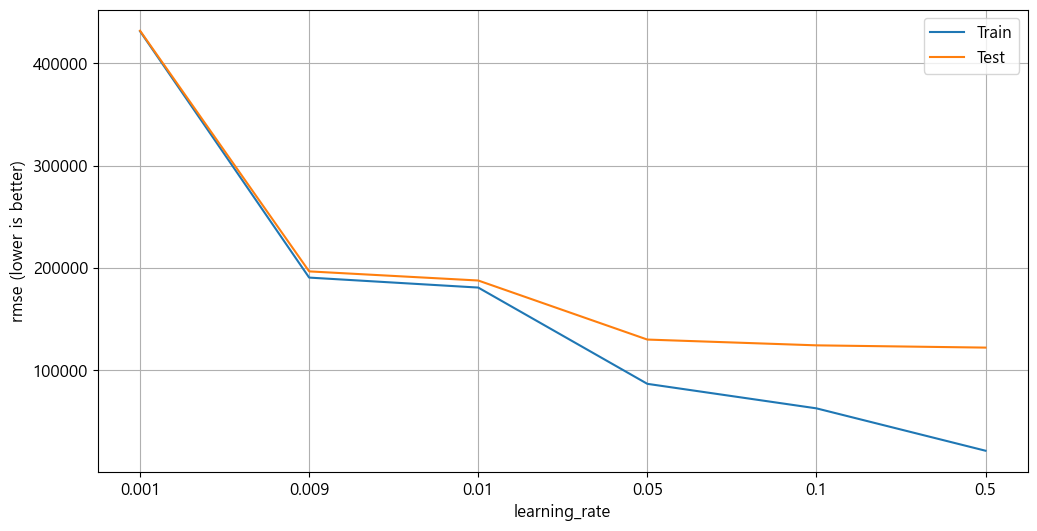

,훈련 데이터,검증 데이터,Min-Max
learning_rate,,,
0.001,431582.369986,432080.769454,최대값
0.009,190258.884524,196334.855796,
0.010,180486.503194,187403.726325,
0.050,86186.188754,129553.794434,
0.100,62175.651307,123887.386081,
0.500,20666.483179,121676.413210,최소값


In [49]:
yjk_regression_param_plot(model, x_train, y_train, 'learning_rate', params, x_test, y_test, scoring = 'rmse')